In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing = pd.read_csv('../data/housing_cleaned.csv')
housing

,price (in millions),area (in thousands sqft),bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,rooms,area (per room),furnished,luxuries
0,13.30000,7.42,4,2,3,1,0,0,0,1,2,1,6,1236.666667,0,6
1,12.25000,8.96,4,4,4,1,0,0,0,1,3,0,8,1120.000000,0,8
2,12.25000,9.96,3,2,2,1,0,1,0,0,2,1,6,1660.000000,0,5
3,12.21500,7.50,4,2,2,1,0,1,0,1,3,1,7,1071.428571,0,7
4,11.41000,7.42,4,1,2,1,1,1,0,1,2,0,6,1236.666667,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.82000,3.00,2,1,1,1,0,1,0,0,2,0,4,750.000000,1,4
541,1.76715,2.40,3,1,1,0,0,0,0,0,0,0,4,600.000000,0,1
542,1.75000,3.62,2,1,1,1,0,0,0,0,0,0,3,1206.666667,1,1
543,1.75000,2.91,3,1,1,0,0,0,0,0,0,0,4,727.500000,0,1


# Housing Prices (Models)
Here are the different models I utilized to predict the cost of different houses based on different features


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
X = housing.drop('price (in millions)', axis=1)
y = housing['price (in millions)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Linear Regression Model
First, I am going to test the simplest model (Linear Regression) to see how it does with the data. If the accuracy does not seem great then I will look into other models.

In [28]:
linear=LinearRegression()

In [29]:
linear.fit(X_train, y_train)

LinearRegression()

In [30]:
linear_pred = linear.predict(X_test)

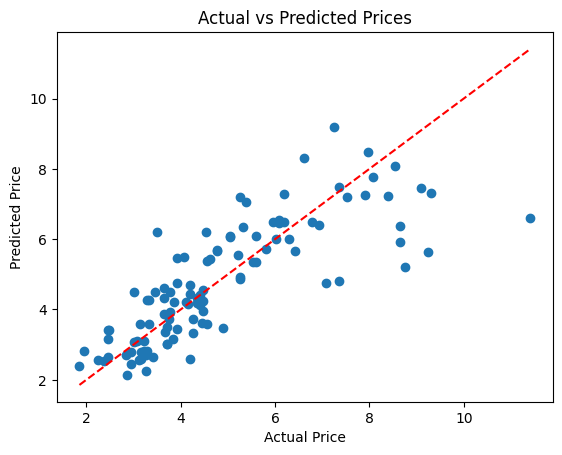

In [31]:
plt.scatter(y_test, linear_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
print("MAE:", mean_absolute_error(y_test, linear_pred))
print("MSE:", mean_squared_error(y_test, linear_pred))
print("R² Score:", r2_score(y_test, linear_pred))

MAE: 0.8142738954382561
MSE: 1.3332019708349894
R² Score: 0.6350893126311664


# Decision Tree Regressor
I am choosing a Decision Tree Regressor because the linear was not as accurate when the actual price of the house was on the higher end.

In [34]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

In [35]:
tree = DecisionTreeRegressor(max_depth = 6,random_state=42)

In [36]:
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

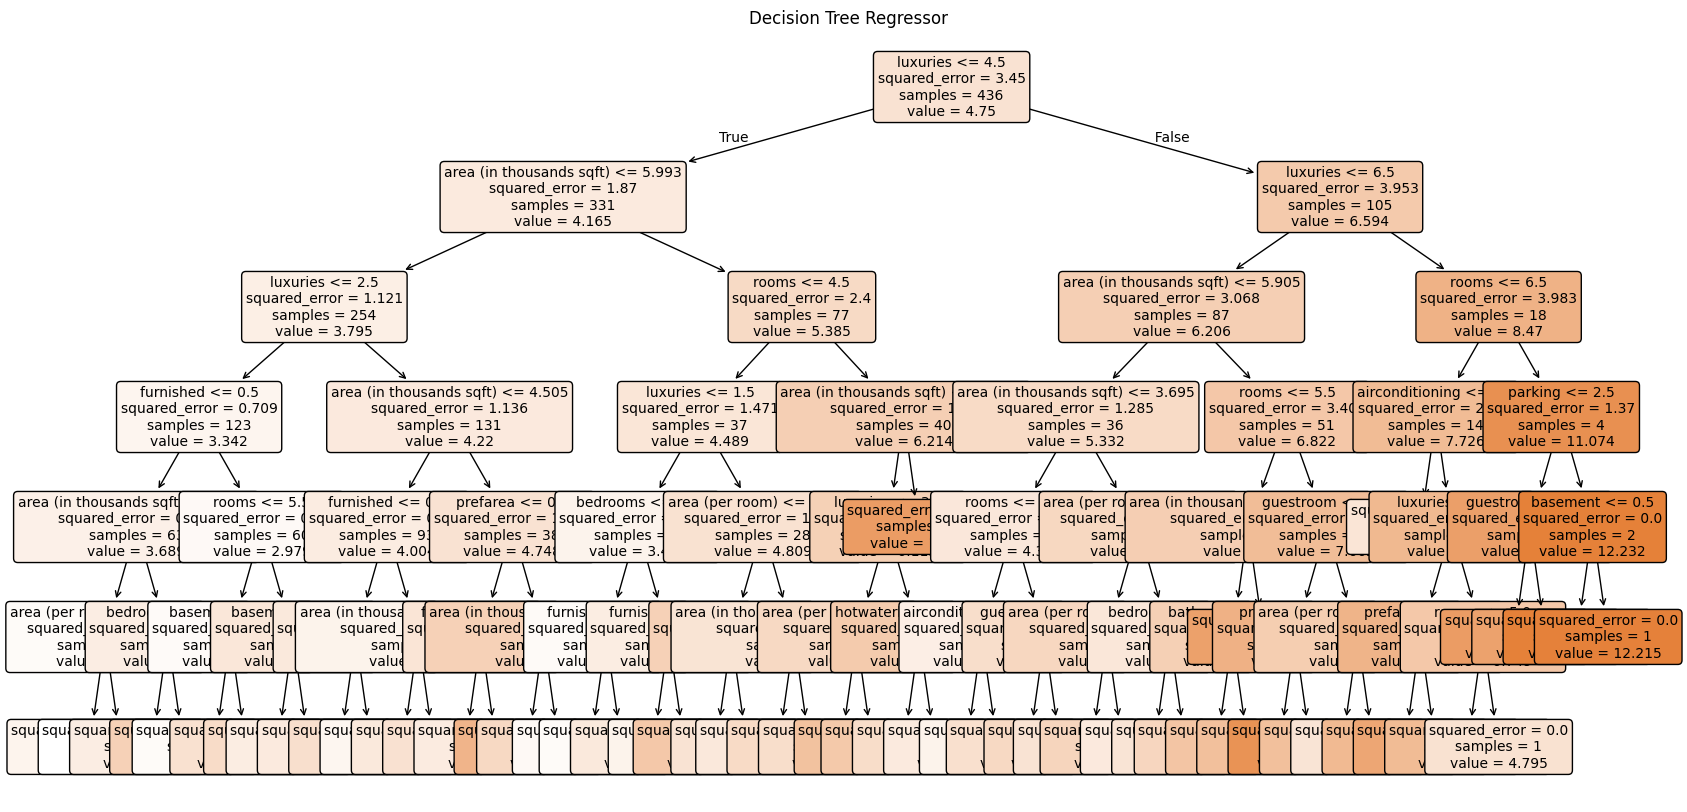

In [37]:
plt.figure(figsize=(20, 10)) 
plot_tree(
    tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Regressor")
plt.show()

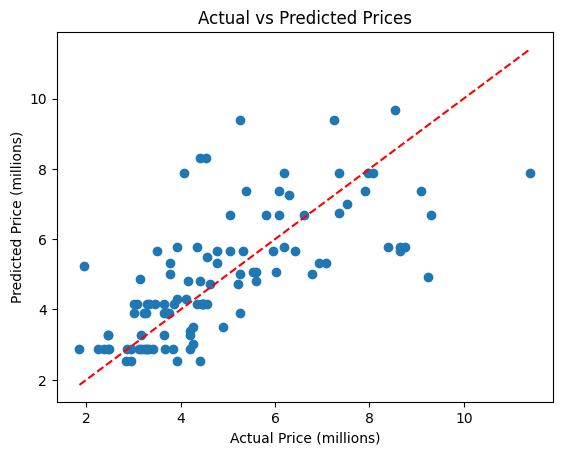

In [38]:
plt.scatter(y_test, tree_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (millions)")
plt.ylabel("Predicted Price (millions)")
plt.title("Actual vs Predicted Prices")
plt.show()

In [39]:
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

print(f"MAE: {tree_mae:.3f}")
print(f"MSE: {tree_mse:.3f}")
print(f"R² Score: {tree_r2:.3f}")

MAE: 1.048
MSE: 2.077
R² Score: 0.431


# Random Forest Regressor
Thought process here, decision tree will probably increase in accuracy with more depth. Even better if there are more than one decision tree

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
rf_pred = rf.predict(X_test)

In [53]:
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

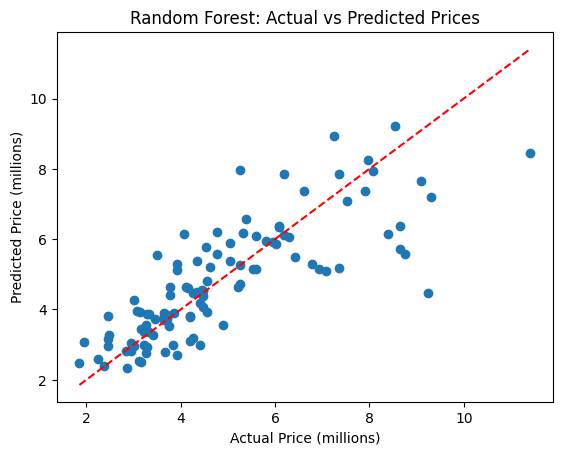

In [43]:
plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (millions)")
plt.ylabel("Predicted Price (millions)")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.show()

In [44]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"MAE: {rf_mae:.3f}")
print(f"MSE: {rf_mse:.3f}")
print(f"R² Score: {rf_r2:.3f}")

MAE: 0.793
MSE: 1.295
R² Score: 0.646


# Gradient Boosting (XGBoost)

In [45]:
from sklearn.ensemble import GradientBoostingRegressor


In [46]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)

In [47]:
gbr.fit(X_train, y_train)
gbr_pred=gbr.predict(X_test)

/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_69116/1522347524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=importance.index, palette='crest')


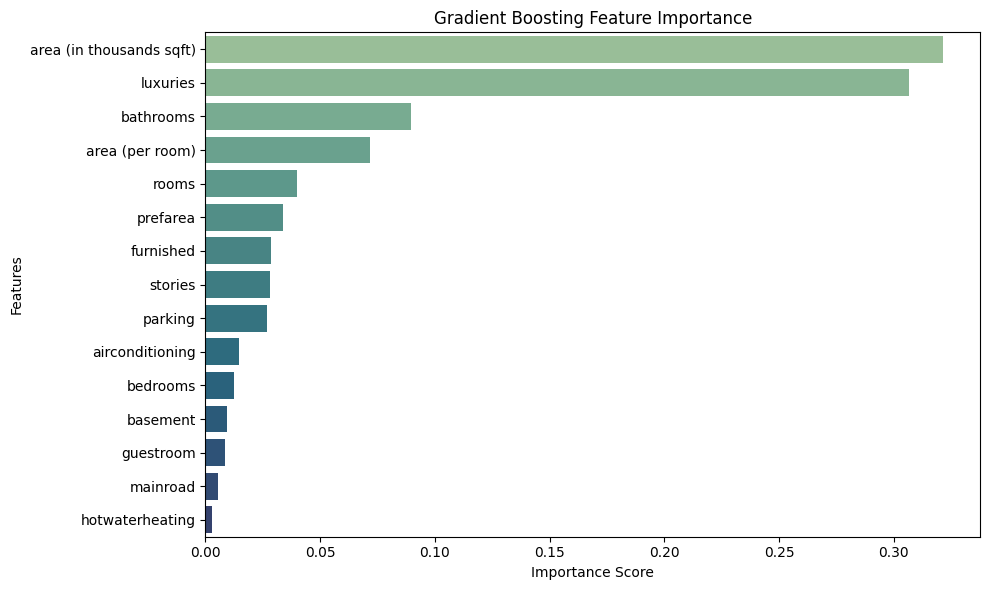

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=importance.index, palette='crest')
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [48]:
print("MAE:", mean_absolute_error(y_test, gbr_pred))
print("MSE:", mean_squared_error(y_test, gbr_pred))
print("R² Score:", r2_score(y_test, gbr_pred))

MAE: 0.7859505124751058
MSE: 1.313539957906396
R² Score: 0.6404710018348917
